**Банки — Анализ оттока клиентов**

**Задача:**

Нужно проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

**Интрукция по выполнению проекта:**

Шаг 1. Загрузить данные.

Шаг 2. Провести исследовательский анализ данных (EDA)
* 2.1 Просмотрт датасета
* 2.2 Посмотрим на средние значения признаков в двух группах, кто ушёл и кто остался
* 2.3 Построить столбчатые гистограммы
* 2.4 Построить матрицу корреляций
    
Шаг 3. Проверка статистических гипотез:
   * Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
   * Сформулировать и проверьте статистическую гипотезу относительно представленных данных

Шаг 4. Общий вывод.

In [31]:
# Загружаю все необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

from scipy.stats import levene
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

### Шаг 1. Загрузка данных.

In [3]:
# Сохраним датасет в датафрейм `df`
df = pd.read_csv('/datasets/bank_dataset.csv')
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


В датасете имеются 10000 строк и 12 колонок.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Для удобства нужно перевести название колонок к нижнему ругистру, в колонке `Balance` имеются пропуски.

### Шаг 2.  Исследовательский анализ данных (EDA).

In [4]:
# Посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.columns = df.columns.str.lower() # Приведем названия столбцов к нижнему регистру
df['estimated_salary'] = df['estimated_salary'].astype('int')# Изменим тип данных estimated_salary на int
df.info() # Проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  int64  
 11  churn             10000 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 937.6+ KB


In [6]:
# Проверим имеются ли дубликаиты
df.duplicated().sum()

0

Дубликатов нет.

В столбце `balance` были замечены пропуски, посмотрим на их количество

In [7]:
# Проверим на ниличие пропусков
df['balance'].isna().sum()

3617

In [8]:
# Проверим пропуки по городу "Ростов Великий"
df_rost = df[df['city'] == 'Ростов Великий']
df_rost['balance'].isna().sum()

0

In [9]:
# Проверим пропуски по городу "Рыбинск"
df_rib = df[df['city'] == 'Рыбинск']
df_rib['balance'].isna().sum()

1199

In [10]:
# Проверим пропуски по городу "Ярославль"
df_Yar = df[df['city'] == 'Ярославль']
df_Yar['balance'].isna().sum()

2418

Пропусков 3617 штук. Анализ показал, что все пропуски из городов Ярославля и Рыбинска, около половины клиентов из этих городов остались без информации о балансе. Возможно клиенты на момент выгруки уже не пользовались счётом или произошёл сбой при выгрузки данных из этих городов. Заменим пропуски отрицательным балансом.

In [11]:
df.fillna(-1, inplace=True)

In [12]:
#Заменим пропуски медианой
#df['balance'].fillna(df.groupby('city')['balance'].transform('median'), inplace=True)
#Проверим результат
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

#### Посмотрим на датасет методом `describe`

In [13]:
#Посмотрим на датасет методом describe()
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.53",1.53,0.71,0.52,"100,089.75",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.85",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,-1.00,1.00,0.00,0.00,11.00,0.00
25%,"15,671,264.25",584.00,32.00,3.00,-1.00,1.00,0.00,0.00,"51,001.75",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.50",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,387.75",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.00",1.00


- Минимальный возраст клиентов 18 лет, максимальный 92
- Количество объектов в собственности от 0 до 10
- Количество продуктов банка 4, у 50% клиентов только один продукт
- У половины клиентов имеются кредитные карты
- Активных клиентов примерно половина
- Зароботная плата клиентов от 11 до 200 тысяч

In [14]:
print(df['gender'].value_counts()) # Псмотрим количество мужчин и женщин 

М    5457
Ж    4543
Name: gender, dtype: int64


Мужчин больше чем женщин примерно на 1000 человек.

#### Посмотрим на средние значения признаков в двух группах, кто ушёл и кто остался.¶

In [15]:
# Посмотрим на тех, кто ушел и тех, кто остался по средним значениям
churn_group = df.groupby('churn').mean()
churn_group_transpose = churn_group.transpose()
churn_group_transpose.rename(columns={0:'Остался', 1:'Ушёл'})

churn,Остался,Ушёл
userid,"15,733,903.88","15,732,787.96"
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,"72,744.91","91,108.29"
products,1.54,1.48
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,737.90","101,465.18"


По средним значениям явно видно, что уходят клиенты у которых возраст около 45 лет и менее активные. По другим признакам всё примерно одинаково.

In [16]:
# Посмотрим на тех, кто ушел и тех, кто остался по медианам.
churn_group_median = df.groupby('churn').median()
churn_group_median_transpose = churn_group_median.transpose()
churn_group_median_transpose.rename(columns={0:'Остался', 1:'Ушёл'})

churn,Остался,Ушёл
userid,"15,734,279.00","15,731,699.00"
score,653.00,646.00
age,36.00,45.00
objects,5.00,5.00
balance,"92,072.68","109,349.29"
products,2.00,1.00
creditcard,1.00,1.00
loyalty,1.00,0.00
estimated_salary,"99,645.00","102,460.00"


По медианам более наглядно кто ушёл и кто остался. Возраст у тех к то остался 36, а у тех кто ушёл 45 лет. Объектов у клиентов одинаковое количество. Продуктов банка у тех кто отсался 2, у тех кто ушёл 1. Остаются активные пользователи.

In [17]:
# Функция рассчета количества выбросов
def function(data, column):
    q1=np.percentile(data[column], 25)
    q3=np.percentile(data[column], 75)
    diff=q3-q1
    min_out=q1-diff*1.5
    max_out=q3+diff*1.5

    print('Количество выбросов:',data[np.logical_or(data[column]<min_out,data[column]>max_out)][column].count(),
         '\nЗначения churn выбросов '+str(column)+':',data[np.logical_or(data[column]<min_out,data[column]>max_out)]['churn'].unique())
for name in df.describe().columns:
    print(name)
    function(df, name)


userid
Количество выбросов: 0 
Значения churn выбросов userid: []
score
Количество выбросов: 15 
Значения churn выбросов score: [1]
age
Количество выбросов: 359 
Значения churn выбросов age: [1 0]
objects
Количество выбросов: 0 
Значения churn выбросов objects: []
balance
Количество выбросов: 0 
Значения churn выбросов balance: []
products
Количество выбросов: 60 
Значения churn выбросов products: [1]
creditcard
Количество выбросов: 0 
Значения churn выбросов creditcard: []
loyalty
Количество выбросов: 0 
Значения churn выбросов loyalty: []
estimated_salary
Количество выбросов: 0 
Значения churn выбросов estimated_salary: []
churn
Количество выбросов: 2037 
Значения churn выбросов churn: [1]


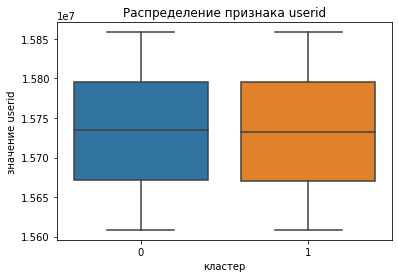

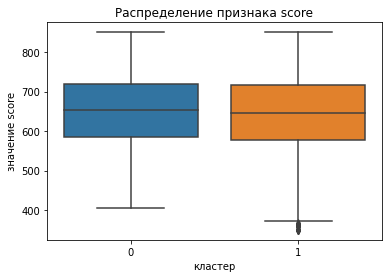

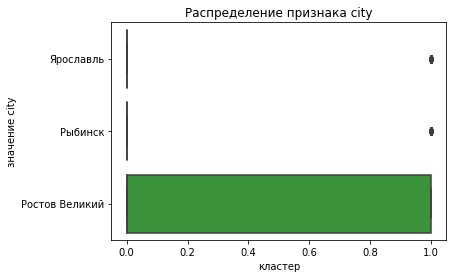

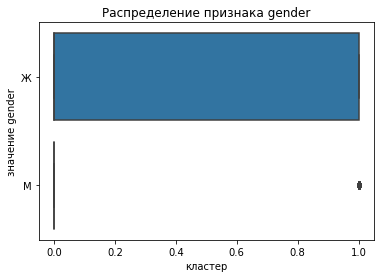

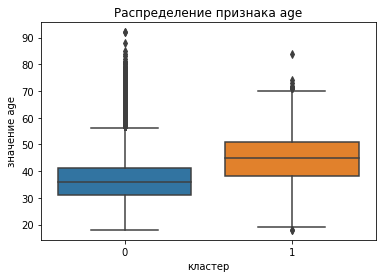

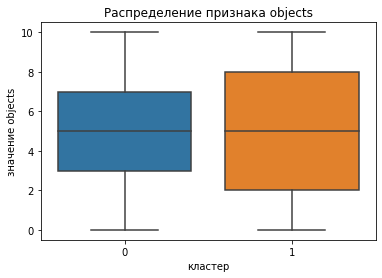

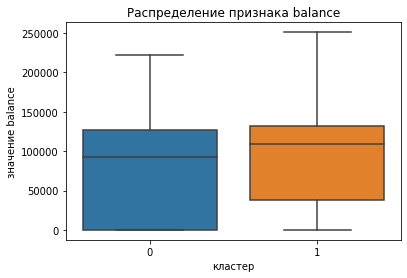

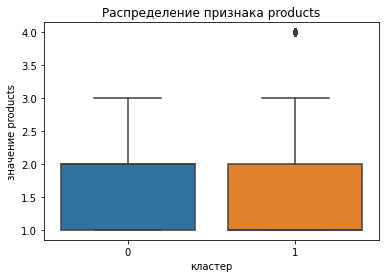

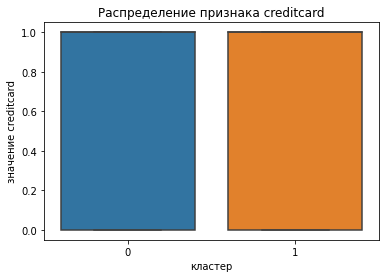

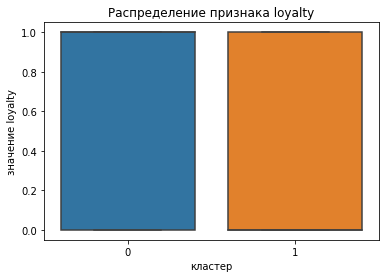

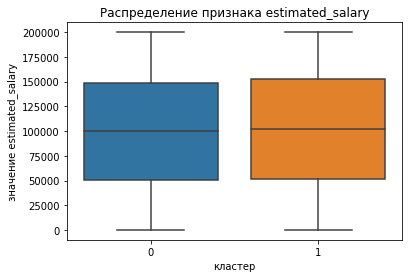

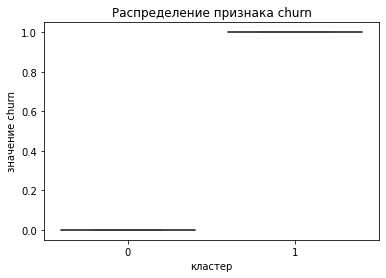

In [18]:
# Построим график боксплоты для большей наглядности
for column in df:
    plt.title("Распределение признака "+column)
    sns.boxplot(x='churn', y=column, data=df)
    plt.xlabel('кластер')
    plt.ylabel('значение '+column)
    plt.show()

#### Построим столбчатые гистограммы

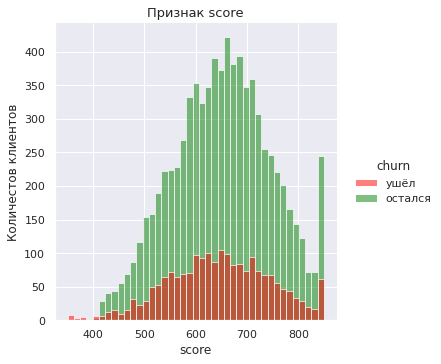

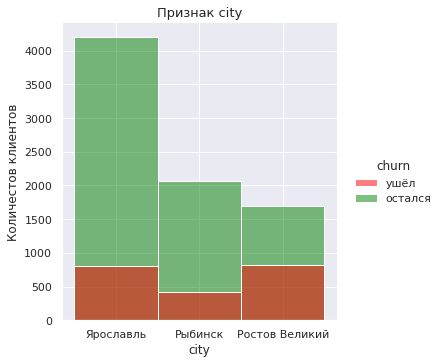

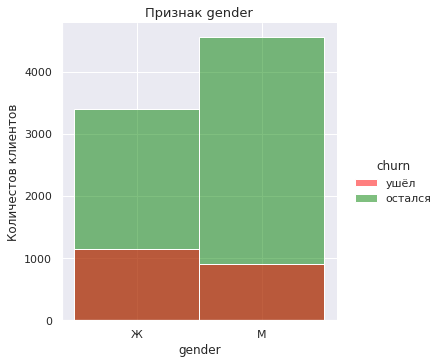

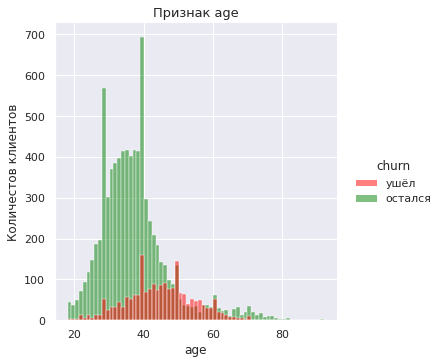

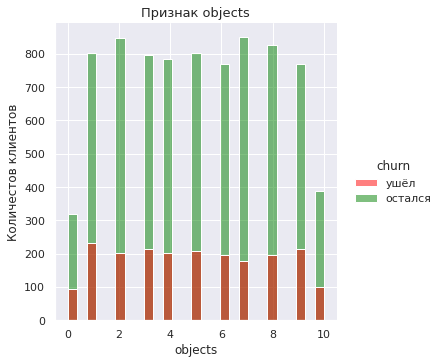

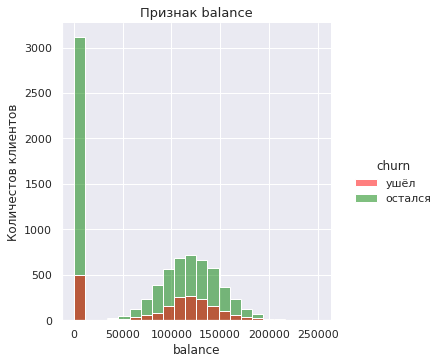

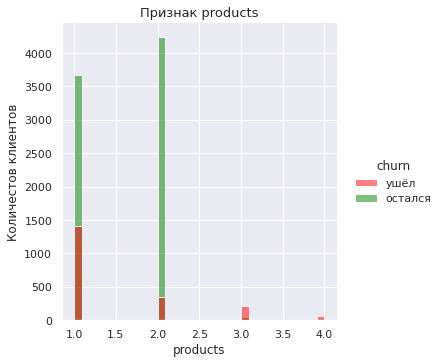

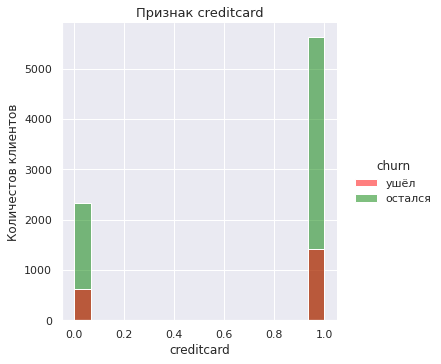

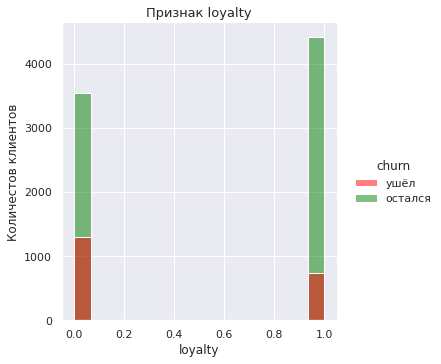

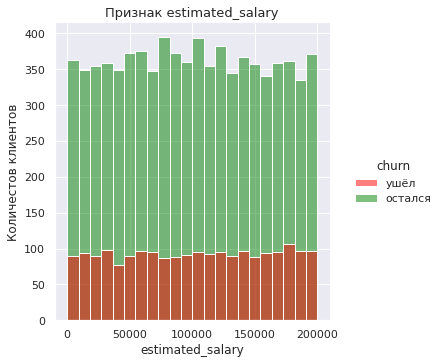

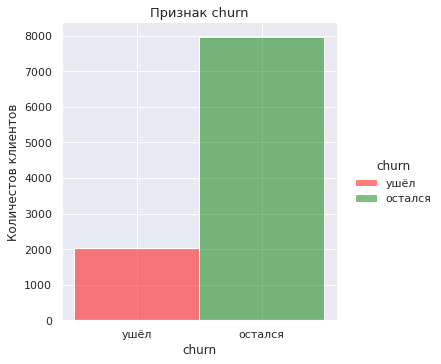

In [19]:
df_1 = df
df_1 = df_1.replace({'churn':{1:'ушёл', 0:'остался'}})

sns.set_theme(style="darkgrid")
sns.set_palette(['red','green'])
def function_hist(data,column):
    sns.displot(data,x=column,hue='churn')
    plt.title('Признак '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Количестов клиентов')
    plt.show()
for name in df_1.columns[1::]:
    function_hist(df_1,name)

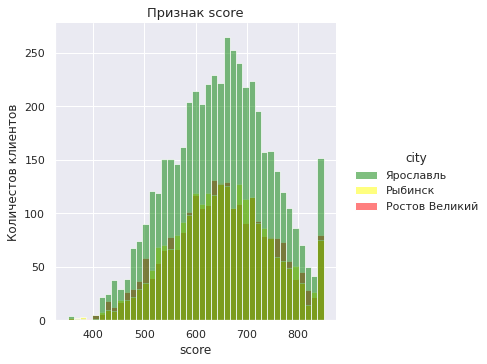

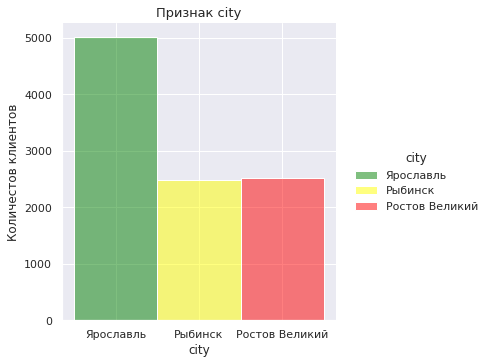

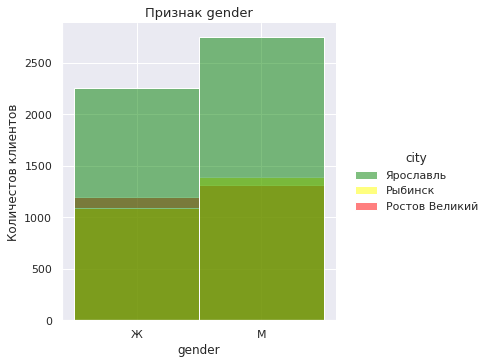

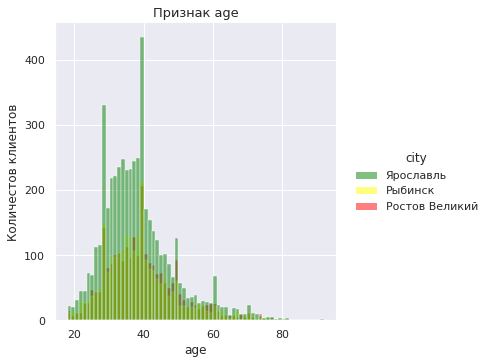

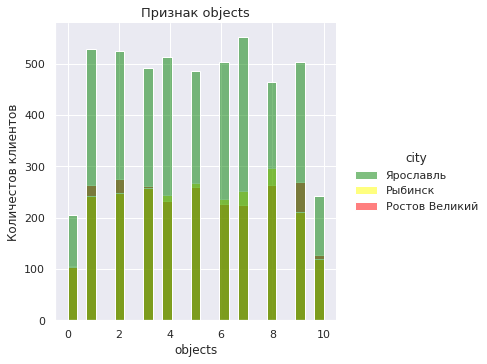

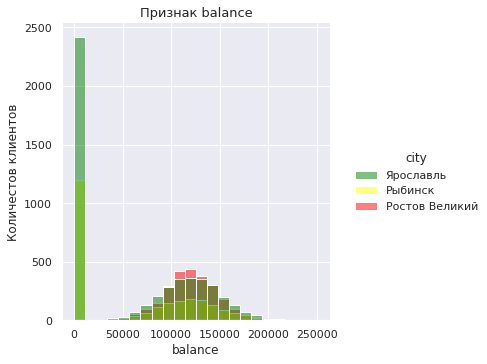

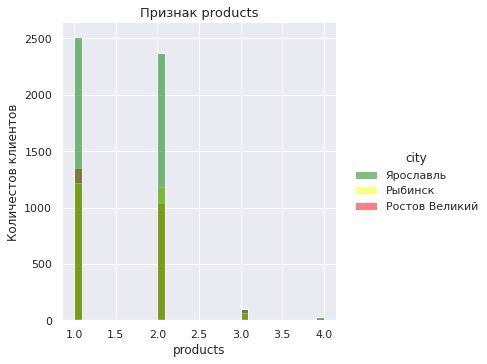

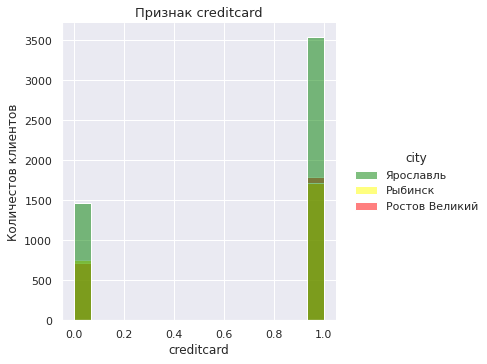

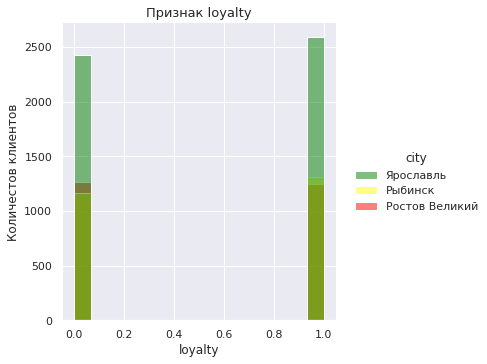

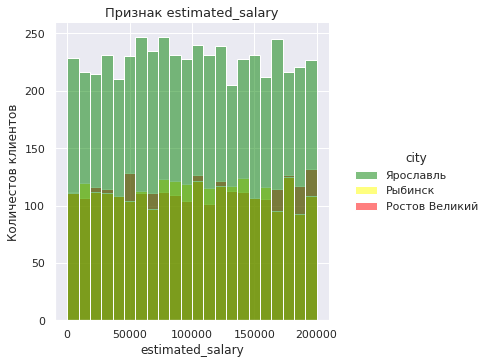

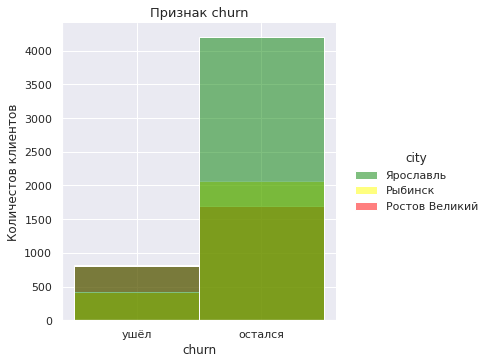

In [20]:
# Постороим столбчатый график с разбивкой по городам.
sns.set_theme(style="darkgrid")
sns.set_palette(['green','yellow', 'red'])
def function_hist(data,column):
    sns.displot(data,x=column,hue='city')
    plt.title('Признак '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Количестов клиентов')
    plt.show()
for name in df.columns[1::]:
    function_hist(df_1,name)

#### Построим матрицу корреляций .

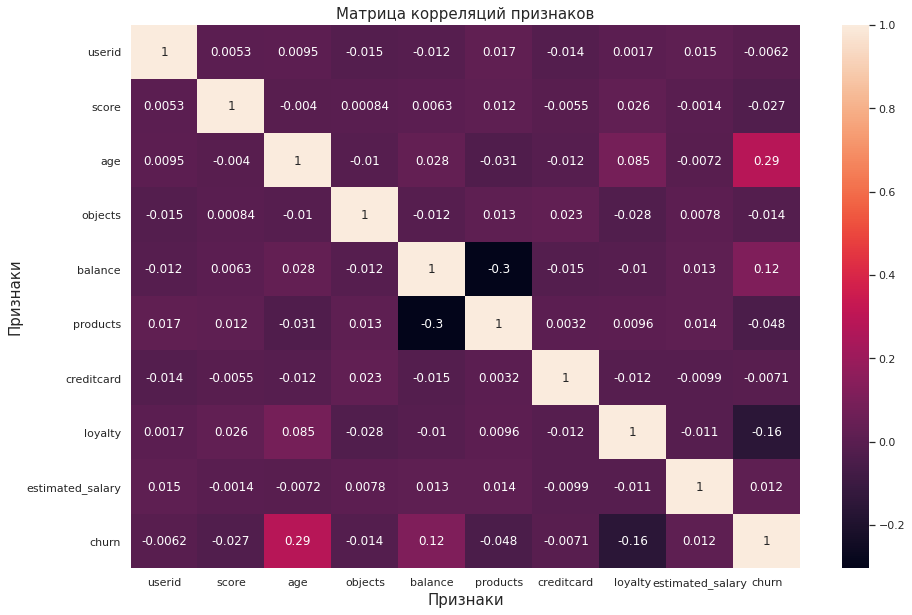

In [21]:
matr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

In [22]:
one_hot_1 = pd.get_dummies(df.churn, prefix='churn')
print(one_hot_1)

      churn_0  churn_1
0           0        1
1           1        0
2           0        1
3           1        0
4           1        0
...       ...      ...
9995        1        0
9996        1        0
9997        0        1
9998        0        1
9999        1        0

[10000 rows x 2 columns]


In [23]:
one_hot_2 = LabelBinarizer().fit_transform(df.churn)
print(one_hot_2)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


**Вывод:**



По построенным гистограммам видим портреты клиентов, которые скорее всего уйдут:

* В целом ушло около 20% клиентов.
* Уходят клиенты чаще в возрасте 40-45 лет. 
* Уходят клиенты у которых 1 продукта банка.
* Мужчины уходят реже чем женщины.
* В городе Ростов Великий примерно половина клиентов ушла. 
* Больше всего клиентов в Ярославле, меньше всего в Рыбенске.
* churn estimated_salary, balance и score распределены примерно одинаково.
* Активные пользователи уходят реже. 
* Клиенты у которых есть кредитные карты уходят так же (примерно 20%) как и те клиенты у которых кредитной карты нет.

По матрице корреляции признаков видим, что явных корреляций нет.

### Проверка статистических гипотез¶

#### Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Нулевая гипотеза - средняя выручка между оставшимися и ушедними пользователями равна
Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается

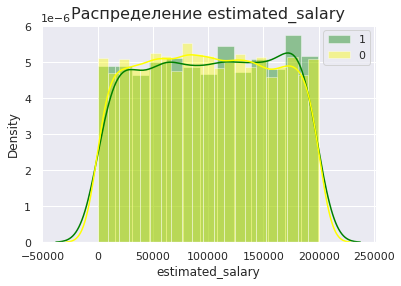

In [24]:
# Проверим данные на нормальное расперделение
df_churn_0 = df.query("churn==0")
df_churn_1 = df.query("churn==1")
sns.distplot(df_churn_1['estimated_salary'],label='1')
sns.distplot(df_churn_0['estimated_salary'],label='0')
plt.title('Распределение estimated_salary',fontsize=16)
plt.legend()
plt.show()

**Вывод:**

t-test можно проводить, данные распределены нормально.

In [25]:
alpha=0.05

print('Дисперсия ушедних:', df_churn_1['estimated_salary'].var())
print('Дисперсия оставшихся:', df_churn_0['estimated_salary'].var())

Дисперсия ушедних: 3353848819.5174017
Дисперсия оставшихся: 3295400995.0256743


**Дисперсии практически равны друг другу.**

In [26]:
results = st.ttest_ind(
    df_churn_0['estimated_salary'], 
    df_churn_1['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22644173695461328
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Нулевую гипотезу отвергнуть не удалось, дисперсии ушедших и оставшихся практически равны и средняя выручка между оставшимися и ушедними пользователями равна.

#### Проверим гипотезу разное количество продуктов банка между теми клиентами, которые ушли и теми, которые остались.

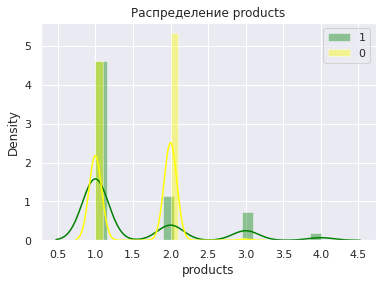

In [27]:
# Проверим данные на нормальное расперделение
sns.distplot(df_churn_1['products'],label='1')
sns.distplot(df_churn_0['products'],label='0')
plt.title('Распределение products')
plt.legend()
plt.show()

Нулевая гипотеза - среднее количество продуктов банка между оставшимися и ушедними пользователями равно.

Альтернативная гипотеза - среднее количество продуктов банка  между оставшимися и ушедними пользователями отличается.

In [28]:
alpha=0.05

print('Дисперсия ушедних:', df_churn_1['products'].var())
print('Дисперсия оставшихся:', df_churn_0['products'].var())

Дисперсия ушедних: 0.6424351848369025
Дисперсия оставшихся: 0.259626450555371


**Дисперсии отличаются**

In [29]:
results = st.ttest_ind(
    df_churn_0['products'], 
    df_churn_1['products'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00021858494460549394
Отвергаем нулевую гипотезу


**Вывод:**

Отвергаем нулевую гипотезу, дисперсии ушедших и оставшихся отличаются и среднее количество продуктов банка между оставшимися и ушедними пользователями разное. Чем больше у клиента продуктов банка, тем он больше заинтересован в нём остаться.

### Общий вывод и рекомендации.

По результатам анализа были получены следующие результаты:

* Уходят клиенты чаще в возрасте 40-45 лет, остаются 35-40 лет. 
* Уходят клиенты у которых 1 продукта банка. Так же почти все пользователи с количеством продуктов 3 и 4 ушли. Хорошо остаются клиенты с двумя продуктами банка.
* Мужчины уходят реже чем женщины.
* В городе Ростов Великий примерно половина клиентов ушла. Больше всего осталось клиентов в городе Ярославль. 
* Заработная плата клиента, баланс на счёте и баллы кредитного скоринга распределены примерно одинаково.
* Активные пользователи уходят реже. 
* Клиенты у которых есть кредитные карты уходят так же (примерно 20%) как и те клиенты у которых кредитной карты нет. Но количество клиентов с кредитными картами больше чем без них.

Проверили две гипотезы:
 
 1) Гипотеза о различия дохода между теми клиентами, которые ушли и теми, которые остались.
 
 Нулевая гипотеза - средняя выручка между оставшимися и ушедними пользователями равна. 
 
 Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается
 
 Дисперсии ушедших и оставшихся практически равны и средняя выручка между оставшимися и ушедними пользователями равна, поэтому нулевую гипотезу отвегнуть не удалось.
 
 2) Гипотеза о разных количествах продуктов банка между теми клиентами, которые ушли и теми, которые остались.
 
 Нулевая гипотеза - среднее количество продуктов банка между оставшимися и ушедними пользователями равно.

Альтернативная гипотеза - среднее количество продуктов банка  между оставшимися и ушедними пользователями отличается.

Дисперсии ушедших и оставшихся отличаются и среднее количество продуктов банка между оставшимися и ушедними пользователями разное, поэтому нулевую гипотезу отвергаем.

**Рекомендации:**

Необходимо предлагать больше продуктов банка, можно сделать пакет услуг. В городе Ростов Великий следует провести анализ качества предоставляемых услуг, в этом городе большой отток клиентов. Чтобы женщины реже уходили, для них можно провести промоакции. Для людей старше 40 лет, можно предложить специальные льготы по типу ДМС или страхования жизни и здоровья, повышенные ставки по депозитам. Для людей 18 - 25 лет можно предложить пониженные ставки по ипотекам, предлагать карты без годового обслуживания или повышенным кэшбекам.

Моя презентация
https://disk.yandex.ru/i/Z01F7qbOgvOpZA

Мой дашборт
https://public.tableau.com/app/profile/alexandr7510/viz/Final_project_16505566347200/Dashboard1?publish=yes